In [1]:
# Importing Python packages

from astropy.io import fits
import numpy as np
from matplotlib import pylab as plt

# Re-running Correlation Functions

In [11]:
# Setting the path to the folder located in your user where the data is located
files_path = '/pscratch/sd/p/physedw/redoKP6'

# Creating a dictionary to store the obtained correlation functions
correlation_functions = {
    'lyalya': fits.open(f'{path}/correlations/correlation-lyalya/cf_lya_x_lya_exp.fits'),
    'lyalyb': fits.open(f'{path}/correlations/correlation-lyalyb/cf_lya_x_lyb_exp.fits'),
    'qsolya': fits.open(f'{path}/correlations/correlation-qsolya/cf_qso_x_lya_exp.fits'),
    'qsolyb': fits.open(f'{path}/correlations/correlation-qsolyb/cf_qso_x_lyb_exp.fits')
}

# Print basic information to verify that the files are imported
print("=== BASIC INFORMATION ON CORRELATION FUNCTIONS ===")
print(f"{len(correlation_functions)} correlation functions were loaded:")
print()

for name, hdul in correlation_functions.items():
    print(f"📊 {name.upper()}:")
    print("-" * 40)
    hdul.info()
    print()

=== INFORMACIÓN BÁSICA DE LAS FUNCIONES DE CORRELACIÓN ===
Se cargaron 4 funciones de correlación:

📊 LYALYA:
----------------------------------------
Filename: /pscratch/sd/p/physedw/redoKP6/correlations/correlation-lyalya/cf_lya_x_lya_exp.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  COR           1 BinTableHDU     33   2500R x 7C   [D, D, D, D, 2500D, 2500D, K]   
  2  DMATTRI       1 BinTableHDU     15   2500R x 3C   [D, D, D]   

📊 LYALYB:
----------------------------------------
Filename: /pscratch/sd/p/physedw/redoKP6/correlations/correlation-lyalyb/cf_lya_x_lyb_exp.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  COR           1 BinTableHDU     33   2500R x 7C   [D, D, D, D, 2500D, 2500D, K]   
  2  DMATTRI       1 BinTableHDU     15   2500R x 3C   [D, D, D]   

📊 QSOLYA:
----------------------------------------
Filename: /pscrat

In [12]:
# Generating dictionaries to store the data that we will use to plot the correlations

correlation_data = {}
grid_coordinates = {}

# Processing all correlation functions from dictionary 'correlation_functions'
for name, hdul in correlation_functions.items():
    print(f"Processing {name}...")
    
    # Extracting correlation data, RP coordinate and RT coordinate with respect to line-of-sight (LOS)
    corr_data = hdul['COR'].data['DA']
    rp_data = hdul['COR'].data['RP']
    rt_data = hdul['COR'].data['RT']
    
    # Determine grid size automatically
    # For correlations with QSOs, we use fixed dimensions (100, 50). 
    # For correlations without QSOs, we obtain the dimensions automatically.
    if name.startswith('qso'):
        n_parallel = 100
        n_transverse = 50
        print(f" Using fixed grid dimensions: ({n_parallel}, {n_transverse})")
    else:
        n_parallel = int(np.sqrt(corr_data.size))
        n_transverse = n_parallel
        print(f" Using automatic grid dimensions: ({n_parallel}, {n_transverse})")
    
    # Reshape the correlation data and their coordinates data
    correlation_reshaped = corr_data.reshape(n_parallel, n_transverse)
    rp_reshaped = rp_data.reshape(n_parallel, n_transverse)
    rt_reshaped = rt_data.reshape(n_parallel, n_transverse)
    
    # Storing in empty dictionaries
    correlation_data[name] = {
        'correlation': correlation_reshaped,
        'original_data': corr_data
    }
    
    grid_coordinates[name] = {
        'rp': rp_reshaped,
        'rt': rt_reshaped,
        'original_rp': rp_data,
        'original_rt': rt_data
    }
    
    print(f"  ✓ Processed data: {correlation_reshaped.shape}")
    print(f"  ✓ Correlation rank: {np.min(correlation_reshaped):.3f} a {np.max(correlation_reshaped):.3f}")
    print()

print("✅ All data were processed and stored in dictionaries")

Procesando lyalya...
  Grid automático: (50, 50)
  ✓ Datos procesados: (50, 50)
  ✓ Rango correlación: -0.001 a 0.010

Procesando lyalyb...
  Grid automático: (50, 50)
  ✓ Datos procesados: (50, 50)
  ✓ Rango correlación: -0.001 a 0.009

Procesando qsolya...
  Usando grid fijo: (100, 50) para QSO
  ✓ Datos procesados: (100, 50)
  ✓ Rango correlación: -0.097 a 0.011

Procesando qsolyb...
  Usando grid fijo: (100, 50) para QSO
  ✓ Datos procesados: (100, 50)
  ✓ Rango correlación: -0.091 a 0.017

✅ Todos los datos procesados y almacenados en diccionarios


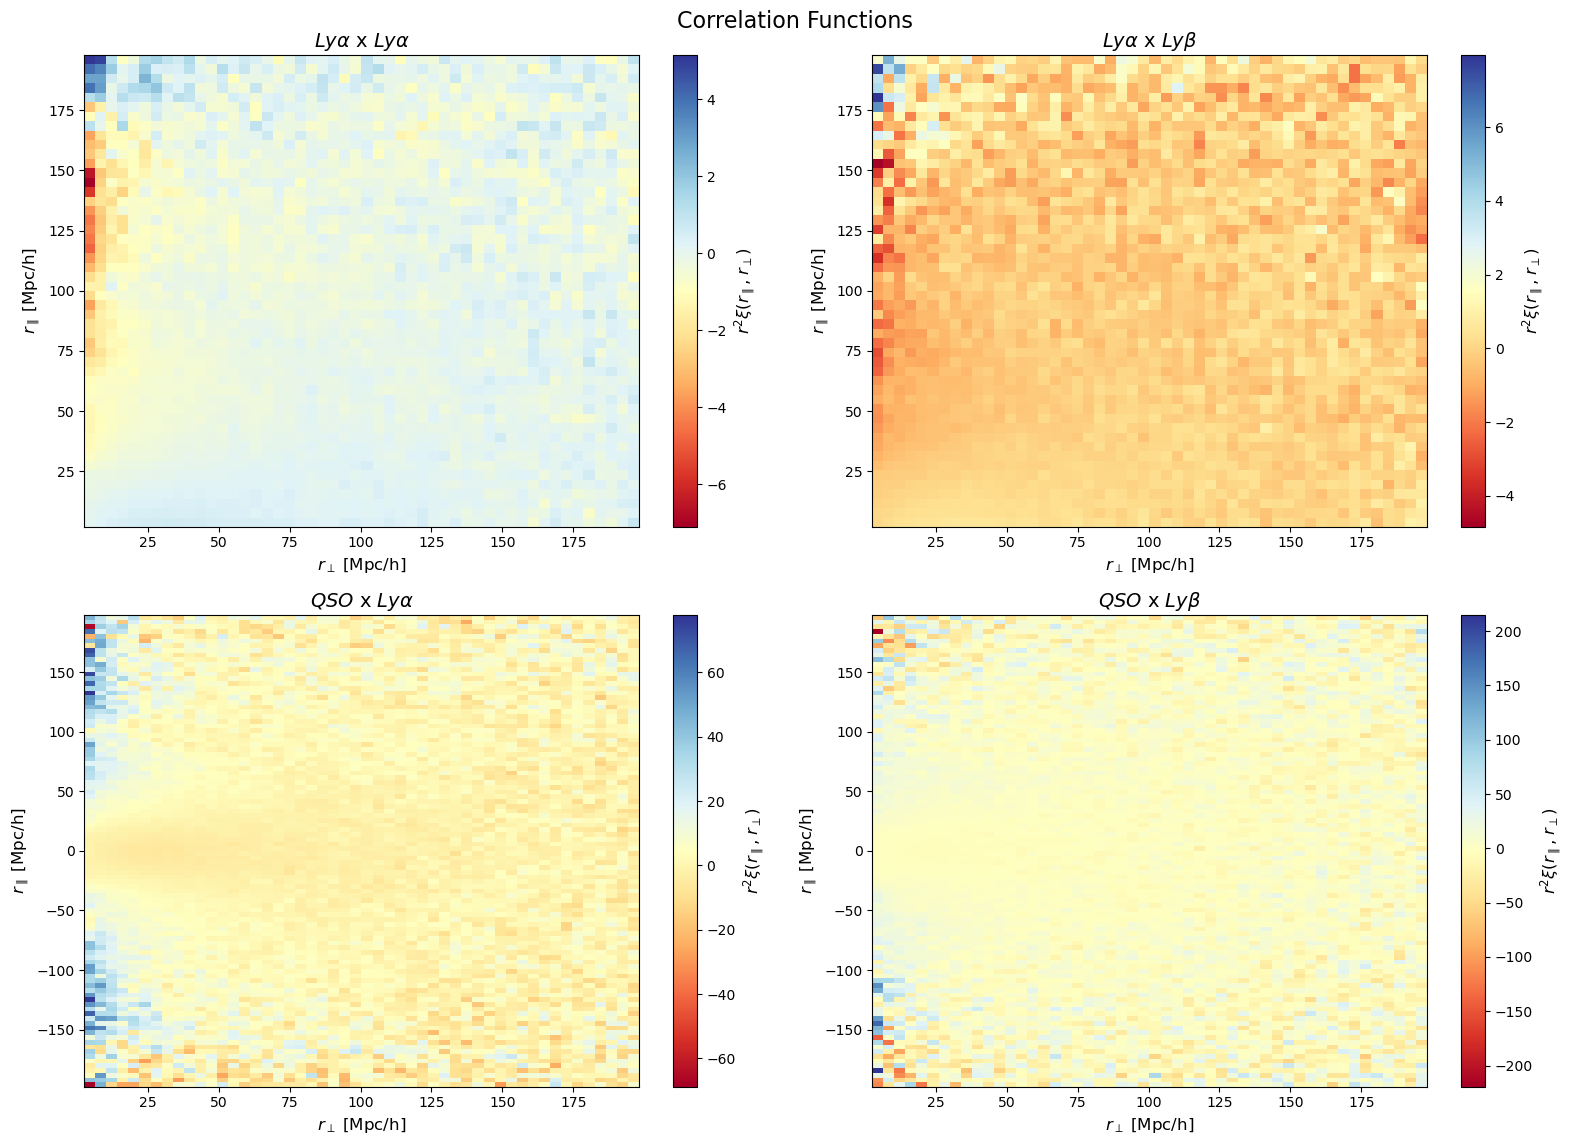

In [21]:
# Plotting correlation functions in bin space

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Correlation Functions\n', fontsize=16, y=0.95)

correlation_names = ['lyalya', 'lyalyb', 'qsolya', 'qsolyb']

for idx, name in enumerate(correlation_names):
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]

    # Getting data from dictionaries
    corr = correlation_data[name]['correlation']
    rp = grid_coordinates[name]['rp']
    rt = grid_coordinates[name]['rt']

    # Calculating the value of the correlation bins to plot
    plot_data = (rt**2 + rp**2) * corr
    
    # Use imshow with extent instead
    extent = [rt.min(), rt.max(), rp.min(), rp.max()]
    mesh = ax.imshow(plot_data, extent=extent, cmap='RdYlBu', 
                    aspect='auto', origin='lower')
    
    cbar = plt.colorbar(mesh, ax=ax)
    cbar.set_label(r'$r^2\xi$($r_{\parallel}$, $r_{\perp}$)', fontsize=12)
    
    ax.set_xlabel('$r_{\perp}$ [Mpc/h]', fontsize=12)
    ax.set_ylabel('$r_{\parallel}$ [Mpc/h]', fontsize=12)
    
    titles = {
        'lyalya': r'$Ly\alpha$ x $Ly\alpha$',
        'lyalyb': r'$Ly\alpha$ x $Ly\beta$', 
        'qsolya': r'$QSO$ x $Ly\alpha$',
        'qsolyb': r'$QSO$ x $Ly\beta$'
    }
    ax.set_title(titles[name], fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.show()

# Baseline Results

In [22]:
path = "/global/cfs/cdirs/desi/science/lya/y1-kp6/iron-baseline"

# Creating a dictionary to store the BASELINE correlation functions
correlation_functions_baseline = {
    'lyalya': fits.open(f'{path}/correlations/correlation-lyalya-0-0-0/cf_lya_x_lya_exp.fits'),
    'lyalyb': fits.open(f'{path}/correlations/correlation-lyalyb-0-0-0/cf_lya_x_lyb_exp.fits'),
    'qsolya': fits.open(f'{path}/correlations/correlation-qsolya-0-0-0/cf_qso_x_lya_exp.fits'),
    'qsolyb': fits.open(f'{path}/correlations/correlation-qsolyb-0-0-0/cf_qso_x_lyb_exp.fits')
}

# Print basic information to verify that the files are imported
print("=== BASIC INFORMATION ON BASELINE CORRELATION FUNCTIONS ===")
print(f"{len(correlation_functions_baseline)} baseline correlation functions were loaded:")
print()

for name, hdul in correlation_functions_baseline.items():
    print(f"📊 BASELINE {name.upper()}:")
    print("-" * 40)
    hdul.info()
    print()

=== INFORMACIÓN BÁSICA DE LAS FUNCIONES DE CORRELACIÓN BASELINE ===
Se cargaron 4 funciones de correlación baseline:

📊 BASELINE LYALYA:
----------------------------------------
Filename: /global/cfs/cdirs/desi/science/lya/y1-kp6/iron-baseline/correlations/correlation-lyalya-0-0-0/cf_lya_x_lya_exp.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  COR           1 BinTableHDU     33   2500R x 7C   [D, D, D, D, 2500D, 2500D, K]   
  2  DMATTRI       1 BinTableHDU     15   2500R x 3C   [D, D, D]   

📊 BASELINE LYALYB:
----------------------------------------
Filename: /global/cfs/cdirs/desi/science/lya/y1-kp6/iron-baseline/correlations/correlation-lyalyb-0-0-0/cf_lya_x_lyb_exp.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  COR           1 BinTableHDU     33   2500R x 7C   [D, D, D, D, 2500D, 2500D, K]   
  2  DMATTRI       1 BinTableHDU     15

In [23]:
# Generating dictionaries to store the data that we will use to plot the BASELINE correlations

correlation_data_baseline = {}
grid_coordinates_baseline = {}

# Processing all correlation functions from dictionary 'correlation_functions_baseline'
for name, hdul in correlation_functions_baseline.items():
    print(f"Processing BASELINE {name}...")

    # Extracting correlation data, RP coordinate and RT coordinate with respect to line-of-sight (LOS)
    corr_data = hdul['COR'].data['DA']
    rp_data = hdul['COR'].data['RP']
    rt_data = hdul['COR'].data['RT']
    
    # Determine grid size automatically
    # For correlations with QSOs, we use fixed dimensions (100, 50). 
    # For correlations without QSOs, we obtain the dimensions automatically.
    if name.startswith('qso'):
        n_parallel = 100
        n_transverse = 50
        print(f" Using fixed grid dimensions: ({n_parallel}, {n_transverse})")
    else:
        n_parallel = int(np.sqrt(corr_data.size))
        n_transverse = n_parallel
        print(f" Using automatic grid dimensions: ({n_parallel}, {n_transverse})")
    
    # Reshape the correlation data and their coordinates data
    correlation_reshaped = corr_data.reshape(n_parallel, n_transverse)
    rp_reshaped = rp_data.reshape(n_parallel, n_transverse)
    rt_reshaped = rt_data.reshape(n_parallel, n_transverse)
    
    # Storing in BASELINE empty dictionaries
    correlation_data_baseline[name] = {
        'correlation': correlation_reshaped,
        'original_data': corr_data
    }
    
    grid_coordinates_baseline[name] = {
        'rp': rp_reshaped,
        'rt': rt_reshaped,
        'original_rp': rp_data,
        'original_rt': rt_data
    }
    
    print(f"  ✓ Processed data: {correlation_reshaped.shape}")
    print(f"  ✓ Correlation rank: {np.min(correlation_reshaped):.3f} a {np.max(correlation_reshaped):.3f}")
    print()

print("✅ All BASELINE data were processed and stored in dictionaries")

Procesando BASELINE lyalya...
  Grid automático: (50, 50)
  ✓ Datos procesados: (50, 50)
  ✓ Rango correlación: -0.001 a 0.010

Procesando BASELINE lyalyb...
  Grid automático: (50, 50)
  ✓ Datos procesados: (50, 50)
  ✓ Rango correlación: -0.001 a 0.009

Procesando BASELINE qsolya...
  Usando grid fijo: (100, 50) para QSO
  ✓ Datos procesados: (100, 50)
  ✓ Rango correlación: -0.097 a 0.011

Procesando BASELINE qsolyb...
  Usando grid fijo: (100, 50) para QSO
  ✓ Datos procesados: (100, 50)
  ✓ Rango correlación: -0.091 a 0.017

✅ Todos los datos BASELINE procesados y almacenados en diccionarios


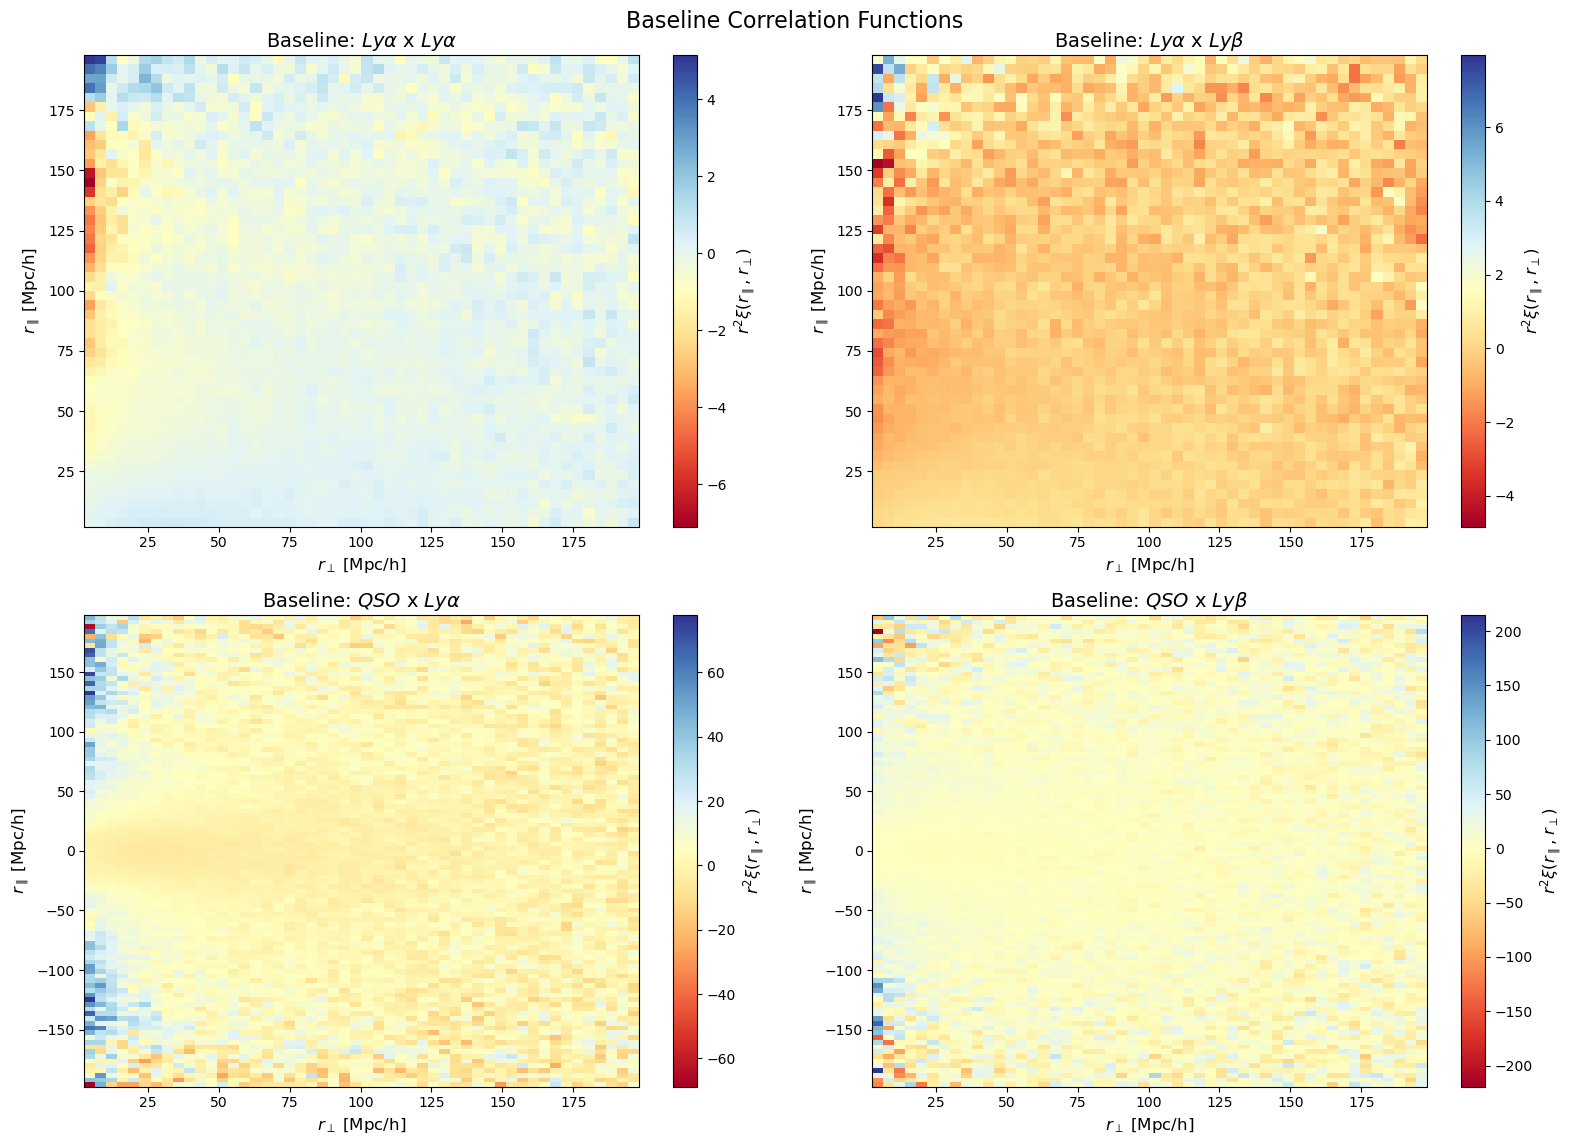

In [26]:
# Plotting BASELINE correlation functions in bin space

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Baseline Correlation Functions\n', fontsize=16, y=0.95)

correlation_names = ['lyalya', 'lyalyb', 'qsolya', 'qsolyb']

for idx, name in enumerate(correlation_names):
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]
    
    # Getting data from BASELINE dictionaries
    corr = correlation_data_baseline[name]['correlation']
    rp = grid_coordinates_baseline[name]['rp']
    rt = grid_coordinates_baseline[name]['rt']
    
    # Calculating the value of the correlation bins to plot
    plot_data = (rt**2 + rp**2) * corr
    
    # Use imshow with extent instead
    extent = [rt.min(), rt.max(), rp.min(), rp.max()]
    mesh = ax.imshow(plot_data, extent=extent, cmap='RdYlBu', 
                    aspect='auto', origin='lower')
    
    cbar = plt.colorbar(mesh, ax=ax)
    cbar.set_label(r'$r^2\xi$($r_{\parallel}$, $r_{\perp}$)', fontsize=12)
    
    ax.set_xlabel('$r_{\perp}$ [Mpc/h]', fontsize=12)
    ax.set_ylabel('$r_{\parallel}$ [Mpc/h]', fontsize=12)
    
    titles = {
        'lyalya': r'Baseline: $Ly\alpha$ x $Ly\alpha$',
        'lyalyb': r'Baseline: $Ly\alpha$ x $Ly\beta$', 
        'qsolya': r'Baseline: $QSO$ x $Ly\alpha$',
        'qsolyb': r'Baseline: $QSO$ x $Ly\beta$'
    }
    ax.set_title(titles[name], fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.show()

# Comparisson to Baseline Results

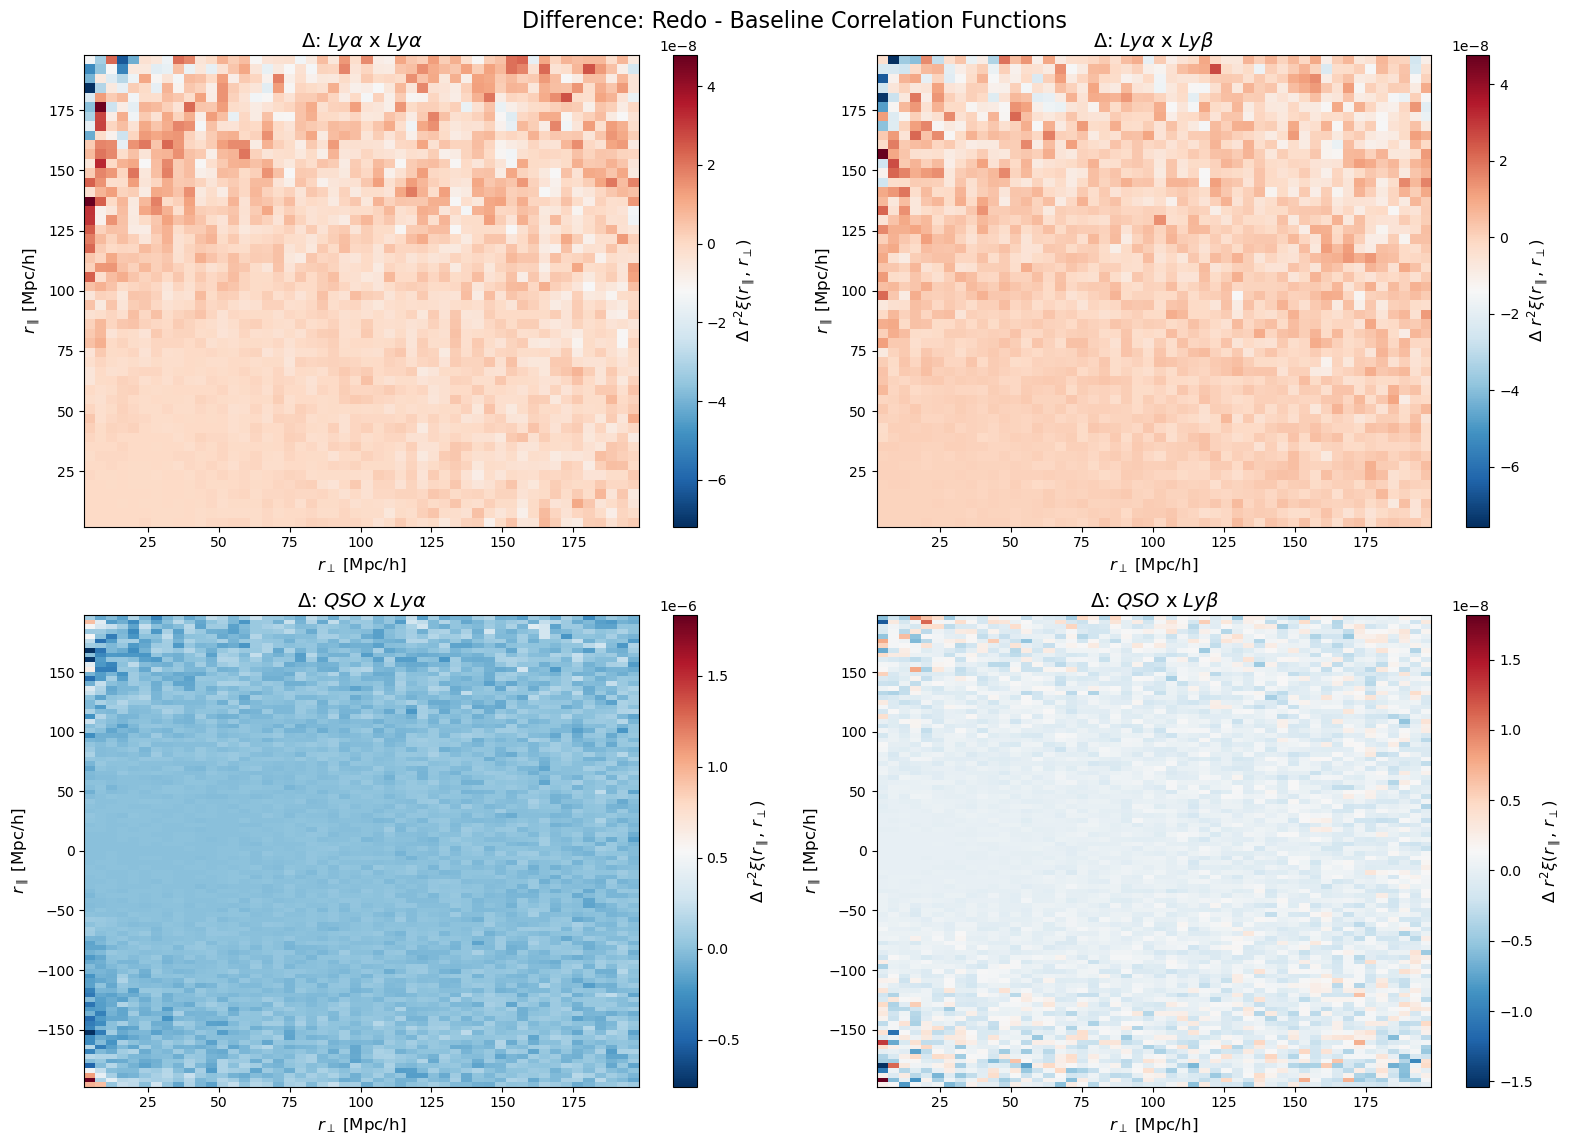

In [34]:
# Plots of the DIFFERENCES between baseline and redo

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Difference: Redo - Baseline Correlation Functions\n', fontsize=16, y=0.95)

correlation_names = ['lyalya', 'lyalyb', 'qsolya', 'qsolyb']

for idx, name in enumerate(correlation_names):
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]
    
    # Getting data from BASELINE dictionaries
    corr_baseline = correlation_data_baseline[name]['correlation']
    rp_baseline = grid_coordinates_baseline[name]['rp']
    rt_baseline = grid_coordinates_baseline[name]['rt']
    
    # Getting data from REDO dictionaries
    corr_redo = correlation_data[name]['correlation']
    rp_redo = grid_coordinates[name]['rp']
    rt_redo = grid_coordinates[name]['rt']
    
    # Calculating the value of the correlation bins to plot

    # difference = (rt_baseline**2 + rp_baseline**2) * (corr_redo - corr_baseline)
    # or
    # ratio = corr_redo/corr_baseline
    
    plot_data_baseline = (rt_baseline**2 + rp_baseline**2) * corr_baseline
    plot_data_redo = (rt_redo**2 + rp_redo**2) * corr_redo
    
    # Calculating the difference: REDO - BASELINE
    difference = plot_data_redo - plot_data_baseline
    
    # Use imshow with extent instead
    extent = [rt_baseline.min(), rt_baseline.max(), rp_baseline.min(), rp_baseline.max()]
    mesh = ax.imshow(difference, extent=extent, cmap='RdBu_r', 
                    aspect='auto', origin='lower')
    
    cbar = plt.colorbar(mesh, ax=ax)
    cbar.set_label(r'$\Delta~ r^2\xi$($r_{\parallel}$, $r_{\perp}$)', fontsize=12)
    
    ax.set_xlabel('$r_{\perp}$ [Mpc/h]', fontsize=12)
    ax.set_ylabel('$r_{\parallel}$ [Mpc/h]', fontsize=12)
    
    titles = {
        'lyalya': r'$\Delta$: $Ly\alpha$ x $Ly\alpha$',
        'lyalyb': r'$\Delta$: $Ly\alpha$ x $Ly\beta$', 
        'qsolya': r'$\Delta$: $QSO$ x $Ly\alpha$',
        'qsolyb': r'$\Delta$: $QSO$ x $Ly\beta$'
    }
    ax.set_title(titles[name], fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.show()